In [ ]:
from jupyter_utils import change_path_to_parent
change_path_to_parent()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.linalg as la
from scipy.sparse import csc_matrix, csr_matrix
from sklearn.datasets import load_svmlight_file, fetch_rcv1

from datasets import get_dataset
from loss_functions import LogisticRegression
from first_order import Gd, Adgd, Nesterov
from stochastic_first_order import Sgd, Shuffling

In [3]:
A, b = get_dataset('rcv1.binary')
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
if dim <= 1000:
    L = loss.smoothness()
else:
    L = loss.average_smoothness()
l2 = L / (1 * np.sqrt(n))
loss.l2 = l2
x0 = csc_matrix((dim, 1))
n_epoch = 100

In [4]:
gd = Gd(loss=loss, it_max=n_epoch)
gd_trace = gd.run(x0=x0)

The dimension is 47236, which might be too large 
            for computing the largest eigenvalue of
            the covariance matrix, so an estimate is returned.
            Set use_eigen_if_large=True to compute anyway 


In [5]:
nest = Nesterov(loss=loss, it_max=n_epoch)
nest_trace = nest.run(x0=x0)
nest_trace.compute_loss_of_iterates()
f_opt = np.min(nest_trace.loss_vals)
x_opt = nest_trace.xs[-1]

The dimension is 47236, which might be too large 
            for computing the largest eigenvalue of
            the covariance matrix, so an estimate is returned.
            Set use_eigen_if_large=True to compute anyway 


In [16]:
nest_str = Nesterov(loss=loss, it_max=n_epoch, mu=l2, strongly_convex=True)
nest_str_trace = nest_str.run(x0=x0)
nest_str_trace.compute_loss_of_iterates()

The dimension is 47236, which might be too large 
            for computing the largest eigenvalue of
            the covariance matrix, so an estimate is returned.
            Set use_eigen_if_large=True to compute anyway 


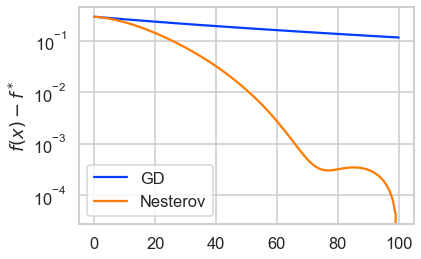

In [6]:
sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
gd_trace.plot_losses(f_opt=f_opt, label='GD')
nest_trace.plot_losses(f_opt=f_opt, label='Nesterov')
plt.yscale('log')
plt.legend()

In [7]:
adgd = Adgd(loss=loss, it_max=n_epoch)
adgd_trace = adgd.run(x0=x0)

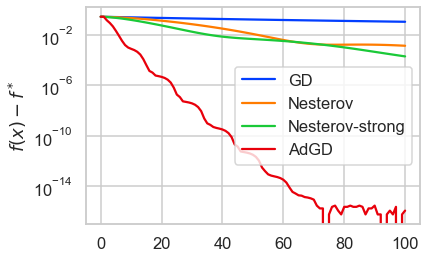

In [17]:
sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
traces = [gd_trace, nest_trace, adgd_trace]
f_opt = np.min([np.min(trace.loss_vals) for trace in traces])
gd_trace.plot_losses(f_opt=f_opt, label='GD')
nest_trace.plot_losses(f_opt=f_opt, label='Nesterov')
nest_str_trace.plot_losses(f_opt=f_opt, label='Nesterov-strong')
adgd_trace.plot_losses(f_opt=f_opt, label='AdGD')
plt.yscale('log')
plt.legend()